En este ejemplo se toma una imagen de mapa de bits, se convierte a escala de grises de 8 bits y se calcula su transformada de Fourier.
Aplicar un filtro sobre la transformada de Fourier para eliminar algunas frecuencias.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from google.colab import files
from skimage import io

uploaded = files.upload()

Saving imagen_ruido_periodico.bmp to imagen_ruido_periodico.bmp


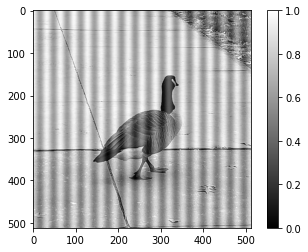

In [ ]:
#Se lee el archivo usando skimage io
for i in uploaded.keys():
  filename=i
image = io.imread(filename) #Si es una imagen de mapa de bits a color, debe tratarse cada componente de color por separado.
sizeX=np.shape(image)[1] #Número de columnas
sizeY=np.shape(image)[0] #Número de filas

####################################Hacer esto si la imagen es bmp de 24 bits (imagen a color).
####################################Si la imagen ya es de 8 bits monocromática no es necesario hacer esto.
imageR=np.zeros((sizeY,sizeX))
imageG=np.zeros((sizeY,sizeX))
imageB=np.zeros((sizeY,sizeX))
imagebw=np.zeros((sizeY,sizeX))
for i in range (sizeX):
  for j in range (sizeY):
    imageR[j][i]=image[j][i][0] #Componente Roja (R)
    imageG[j][i]=image[j][i][1] #Componente Verde (G)
    imageB[j][i]=image[j][i][2] #Componente azul (B)
    imagebw=(imageR+imageG+imageB)/3 #Imagen en escala de grises
#####################################################################################################
imagebw=imagebw/255 #Se puede normalizar también respecto al valor máximo usando np.max()

plt.imshow(imagebw, cmap='gray')
plt.colorbar()

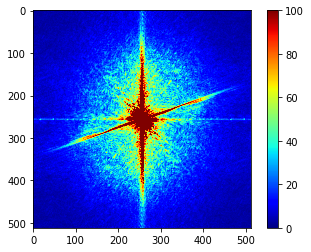

In [ ]:
imageFFT=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(imagebw)))

plt.imshow(abs(imageFFT), vmin=0, vmax=100, cmap='jet') #Se restringe el intervalo de amplitudes para visualizar mejor.
plt.colorbar()

Ejercicio: Implementar un filtro y analizar su efecto.

Posible solución:

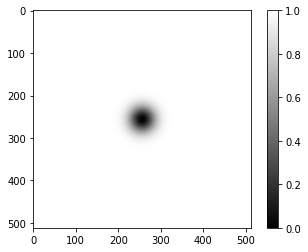

In [ ]:
#Filtro Gaussiano
width=30 #Ancho de la gaussiana. De la imagen original se ve que la frecuencia es alrededor de 0.03 oscilaciones/pixel, esto equivale a la coordenada 256+15=271 en el espacio de las frecuencias.
image_filter = np.zeros((sizeY,sizeX),dtype=complex)
for i in range (sizeX):
  for j in range (sizeY):
    image_filter[j][i]=1-np.exp(-((i-256)**2+(j-256)**2)/width**2)
plt.imshow(abs(image_filter), cmap='gray')
plt.colorbar()

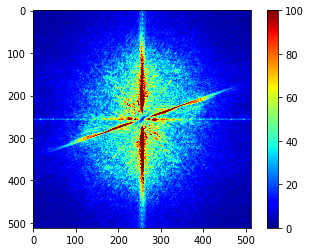

In [ ]:
#Multiplicación del filtro por la transformada
filteredFFT = np.zeros((sizeY,sizeX),dtype=complex)
for i in range (sizeX):
  for j in range (sizeY):
    filteredFFT[j][i]=imageFFT[j][i]*image_filter[j][i]
plt.imshow(abs(filteredFFT), vmin=0, vmax=100, cmap='jet')
plt.colorbar()

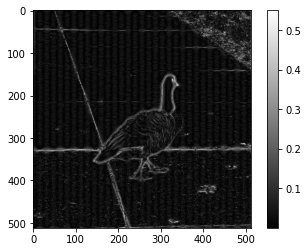

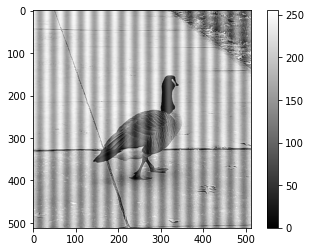

In [ ]:
#Cálculo de la transformada inversa para recuperar la imagen.
filteredImage = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(filteredFFT)))
plt.imshow(np.abs(filteredImage), cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(np.abs(image), cmap='gray')
plt.colorbar()
plt.show()

Modificar el filtro para que la imagen no quede negativa.
Ensayar otros filtros.